# Clustering Analysis on UNSW-NB15 Dataset using MiniBatch K-Means

Notebook ini berisi implementasi metode clustering berbasis unsupervised learning
menggunakan algoritma MiniBatch K-Means pada dataset UNSW-NB15.

Tujuan utama dari eksperimen ini adalah untuk mengidentifikasi pola trafik jaringan
berdasarkan karakteristik statistik tanpa menggunakan label serangan dalam proses pelatihan.


## 1. Import Library

Pada tahap ini dilakukan import library yang dibutuhkan untuk:
- Pengolahan data (pandas, numpy)
- Visualisasi (matplotlib)
- Normalisasi data (StandardScaler)
- Clustering (KMeans dan MiniBatchKMeans)
- Evaluasi clustering (Silhouette Score)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

KeyboardInterrupt: 

## 2. Load Dataset

Dataset yang digunakan dalam penelitian ini adalah **UNSW-NB15** yang berisi data
trafik jaringan normal dan serangan. Dataset dibaca dari file CSV dan disimpan
dalam bentuk DataFrame untuk memudahkan proses analisis.


In [ ]:
df = pd.read_csv("UNSW_NB15_training-set.csv")
df.head()
df.shape

(175341, 45)

## Seleksi Fitur Numerik dan Normalisasi

In [ ]:
X = df.select_dtypes(include=[np.number])
X = X.drop(columns=["label", "attack_cat"], errors="ignore")

X.shape

(175341, 40)

## 4. Normalisasi Data

Normalisasi dilakukan menggunakan **StandardScaler** untuk memastikan
setiap fitur memiliki skala yang seragam. Hal ini penting karena algoritma
K-Means berbasis pada perhitungan jarak (distance-based).


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Penentuan Jumlah Cluster dengan Elbow Method

In [ ]:
inertia = []
K_range = range(2, 7)

for k in K_range:
    mbk = MiniBatchKMeans(
        n_clusters=k,
        batch_size=2048,
        random_state=42
    )
    mbk.fit(X_scaled)
    inertia.append(mbk.inertia_)


## 6. Visualisasi Elbow Method

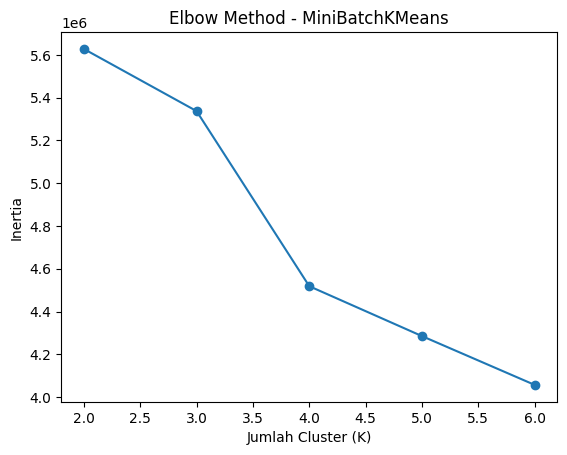

In [ ]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - MiniBatchKMeans")
plt.show()

## 7. Silhouette Analysis (Sampling)

In [ ]:
X_sample = resample(
    X_scaled,
    replace=False,
    n_samples=2000,
    random_state=42
)

## 8. Visualisasi Silhouette Score

In [ ]:
sil_scores = []

for k in K_range:
    mbk = MiniBatchKMeans(
        n_clusters=k,
        batch_size=1024,
        random_state=42
    )
    labels = mbk.fit_predict(X_sample)
    sil_scores.append(silhouette_score(X_sample, labels))


## 9. Pembentukan Model Final

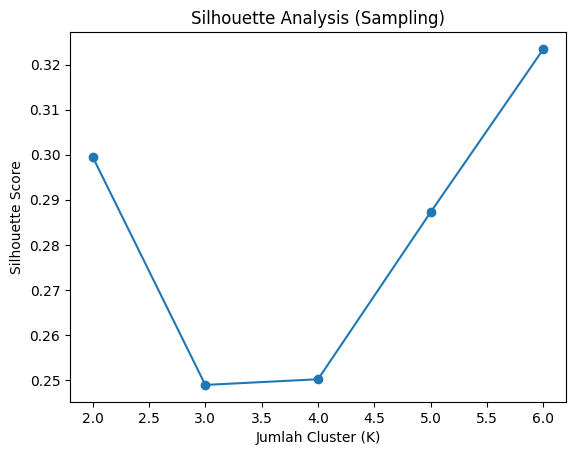

In [ ]:
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (Sampling)")
plt.show()


# 10. Distribusi Hasil Cluster

In [ ]:
optimal_k = 2  # ganti sesuai hasil grafik kamu

final_model = MiniBatchKMeans(
    n_clusters=optimal_k,
    batch_size=2048,
    random_state=42
)

df["cluster"] = final_model.fit_predict(X_scaled)


## 11. Evaluasi Cluster terhadap Label Asli

In [ ]:
df["cluster"].value_counts()


cluster
1    96163
0    79178
Name: count, dtype: int64

## 12. Penyimpanan Dataset Hasil Clustering

In [ ]:
df.to_csv("UNSW_NB15_clustered.csv", index=False)


## 13. Analisis Statistik Cluster

In [ ]:
cluster_profile = df.groupby("cluster")[X.columns].mean()
cluster_profile

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
cluster,,,,,,,,,,,,,,,,,,,,,
0,64603.074642,1.529642,40.374637,41.514019,18664.533785,33015.645432,862.134535,131.240016,171.347761,4.511179e+05,...,2.502450,1.399808,1.056973,2.687085,0.033103,0.033103,0.294665,3.242466,3.474450,0.000000
1,106664.502636,1.219207,3.768653,0.407121,759.578081,36.799351,173251.189803,219.321652,4.074831,1.335626e+08,...,9.233406,8.663634,6.799289,13.705354,0.000000,0.000000,0.000010,10.013238,13.733307,0.028722


In [ ]:
pd.crosstab(df["cluster"], df["label"])


label,0,1
cluster,,
0,38344,40834
1,17656,78507


: 

## Kesimpulan Sementara

Notebook ini menunjukkan bahwa clustering berbasis MiniBatch K-Means
mampu mengelompokkan data trafik jaringan UNSW-NB15 ke dalam dua cluster
utama yang memiliki karakteristik berbeda.

Hasil ini menjadi dasar analisis lanjutan dalam laporan penelitian.
